# Support Vector Machines - Classification:

## 1) Load a data to apply SVM: I will use sklearn digits data

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
digits.data.shape

(1797, 64)

In [4]:
digits.target.shape

(1797,)

In [5]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

## 2) Train Test split:

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

## 3) SVM:

**SVM:**
SVM draws a hyperplane to separate the classes.

SVMs are used for **classification, regression and outliers detection.**

For multiclass classification: **SVC, NuCVS, LinearSVC.** 

**Multiclass** If there are three or more classes, the problem is considered multiclass classification. If there are two classes, then it's a **binary** classification problem. Mutliclass is different from Multilabel classification. In mutliclass, each instance is assigned to only one label: a fruit can be either an apple or a pear but not both at the same time. In **mutlilabel** problems, one instance can have more than one label: a book might be about any of politics or finance at the same time or none of these. 

We can reduce the problem of multiclass classification to multiple binary classification problems. It can be categorized into **One vs Rest and One vs One.** 

**One-vs-rest:** Training one classifier per class. For class A, it will assume instances with class A as positive and the rest as negative. 

**One-vs-one:** Training one binary classifier per two pairs of classes at a time. 

For regression: Support Vector Regression (SVR), NuSVR and LinearSVR.

For outliers detection: OneClassSVM. `estimator.fit` is only given `X_train`. like in an unsupervised model. Predict method sorts the new observations as inliers or outliers: `estimator.predict(X_test)`. 

### Without parameter tuning: the accuracy is 0.52

In [8]:
from sklearn.svm import SVC
svm_classifier = SVC()

In [9]:
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
accuracy = svm_classifier.score(X_test, y_test)

In [11]:
accuracy

0.5222222222222223

## Parameter Tuning for SVM:
### KERNEL:
it must be one of linear, poly, rbf, sigmoid, precomputed or a callable. If none is given , rbf will be used. 
**linear:** for linear models, use this.
**poly:** allows learning of non-linear models. Popular in Natural Language Preprocessing  
**rbf:** more popular than poly for non-linear data points. commonly used in  SVM classifications.    

### REGULARIZATION:
Regularization is termed as C parameter in sklearn library. Smaller C misclassifies more data points, while higher C make better classification to an extend.

### GAMMA:
The model is highly sensitive to gamma parameter. High gamma will cause overfitting.When the gamma is too low, model cannot capture the complexity of the data


### GRID SEARCH:
Scikit-Learn's `GridSearchCV` is a one way to fine-tune model parameters. Grid Search evaluate all possible combinations of hyperparameter using cross-validation from the list of values you provided. The possible hyperparameters for SVC:

In [12]:
svm_classifier.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [13]:
from sklearn.model_selection import GridSearchCV

Let's create the dictionary for the parameter values we want Grid Search to try:

In [14]:
param_grid =[
    {'C':[1, 10, 50, 100],
     'decision_function_shape':['ovr', 'ovo'],
     'gamma':[0.001, 0.01, 0.1],
     'kernel':['rbf', 'poly']
     
    }
]

In [15]:
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='neg_mean_squared_error')

In [16]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 10, 50, 100], 'decision_function_shape': ['ovr', 'ovo'], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf', 'poly']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [17]:
grid_search.best_params_

{'C': 10, 'decision_function_shape': 'ovr', 'gamma': 0.001, 'kernel': 'rbf'}

In [18]:
grid_search.best_estimator_.score(X_test, y_test)

0.9911111111111112

### With Grid Search the accuracy: 0.99

In [19]:
from sklearn.metrics import classification_report

In [20]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        43
          1       1.00      1.00      1.00        37
          2       1.00      1.00      1.00        38
          3       1.00      0.96      0.98        46
          4       1.00      1.00      1.00        55
          5       0.98      1.00      0.99        59
          6       1.00      1.00      1.00        45
          7       0.98      0.98      0.98        41
          8       0.97      1.00      0.99        38
          9       0.98      0.98      0.98        48

avg / total       0.99      0.99      0.99       450



## Cross-Validation cv=10: accuracy score 0.98

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
scores = cross_val_score(grid_search.best_estimator_, digits.data, digits.target, cv=10)
print('all cross validation scores-10 fold:',"\n", scores)
print("average cross_val_score", scores.mean())
print("Variance of cross validation", scores.std())
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

all cross validation scores-10 fold: 
 [0.96756757 1.         0.95027624 0.99444444 0.98324022 0.98882682
 0.99441341 0.99438202 0.97175141 0.96590909]
average cross_val_score 0.981081122784369
Variance of cross validation 0.015506818968315338
Accuracy: 0.98 (+/- 0.03)


## Cross-Validation: cv = Leave One Out: accuracy score 0.99

**Leave One Out:** If you have N images in total, the parameter optimization is performed on N-1 images and then the performance of the model is tested on Nth image. This process is repeated for N times, each time leaving out a different image to use as the single test set. 

In [24]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scoresloo = cross_val_score(grid_search.best_estimator_, digits.data, digits.target, cv = loo, scoring='accuracy')

print( scoresloo.mean() )


0.9905397885364496


In [25]:
print(scoresloo.std())

0.09680245793684823


### Predictions with Grid Search best estimator:

In [26]:
grid_search.best_estimator_.predict(X_test[-1:])

array([5])

In [27]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_test[-1:], y_test[-1:])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

**Grid Search estimate: 5**

In [28]:
grid_search.best_estimator_.predict(X_test[-5:])

array([3, 6, 2, 6, 5])

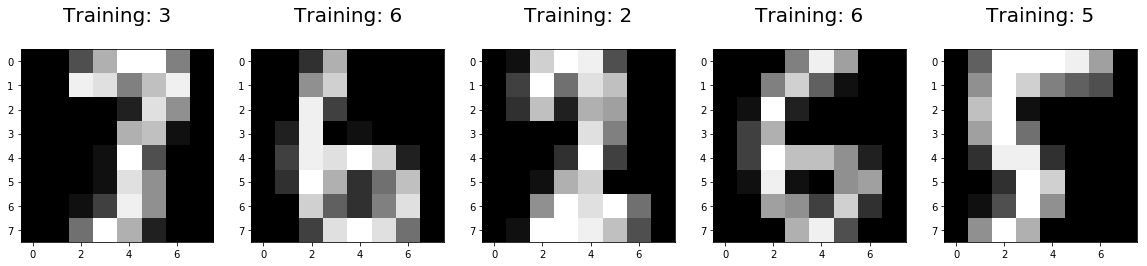

In [29]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_test[-5:], y_test[-5:])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

**Grid Search estimate: 3, 6 ,2 ,6, 5**  

**no grid search and no parameter tuning estimate: 8, 6, 2, 8, 8**

In [30]:
svm_classifier.predict(X_test[-5:])

array([8, 6, 2, 8, 8])